# Telecom Customer Churn Prediction

Compaines are always trying to save money. On that note did you know that attracting a new customer costs approximately 5 times as much as keeping an existing one.



# Overview

1. [Got to Loading libraries and data](#1-loading-libraries-and-data)



2. [Got to Exploratory Data Analysis](#2-exploring-the-data)



3. [Go to EDA Visualization](#3-eda-visualizations)


4. [Go to Preprocessing](#4-Preprocessing)


5. [Go to Modeling](#5-modeling)


6. [Go to Conclusions](#6-conclusion)


7. [Go to Business Suggestions](#7-Business-Suggestions)



[Go to Stopped Here!](#stopped-here)



# 1. Loading libraries and data

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [3]:
# Load Data
df = pd.read_csv('/Users/vcarrillo/Springboard/Springboard-1/Telco-Customer-Churn.csv')

# 2. Exploring the Data

Each row represents a customer, each column contains customer's attributes described on the column.

In [4]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Data set features:

- Customer who left within the last month - column is named 'Churn'
- Services that each customer has signed up for - phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
- Customer account information - how long they have been a customer in years ('tenure'), payment method, type of contract they have (month-to-month, year, ect), monthly charges and total charges.
- Demographic information about customers - gender, age range, and if they have partners and dependents. 

In [5]:
df.shape

(7043, 21)

Dataset shape:
- This data set has 7043 rows and 21 columns. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Count how many of each data type there are in df.
df.dtypes.value_counts()

object     18
int64       2
float64     1
Name: count, dtype: int64

Data type counts:
- This data set contains 18 columns that are object type. I will have to manipulate these later to prepare for machine learning.
- Two columns are int and 1 is float. I might have to scale these during preprocessing for machine learning.
- TotalCharges is an object dtype when it should be numeric. I will have to deal with this during feature engineering. 

In [8]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

- Target value during EDA will be Churn.

In [9]:
# Check for missing data in data set
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing values in this data set. 

In [10]:
# Drop customerID since we will not need this data for this project. 
df = df.drop(['customerID'], axis = 1)

In [11]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [12]:
# Changing TotalCharges to numeric

df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [13]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- Now that TotalCharges is a numeric data type we can see that it has 11 missing values. I have to deal with these before applying machine learning algorythms. 

In [15]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- Upon further investigation I can see that these customers have been customers for less than a month which implies that they are new customers.
- Since they are new customers that means that the monthly charge should also be the TotalCharge.
- However since it is only 11 customers and this represents a minute amount of the customers in data set. I can drop these. 

In [16]:
# dropping missing values
df = df.dropna()

In [17]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Observations:
- Average Monthly Charge is $64.79.
- Average customer tenure is 32 month or approximately 2 years and 9 months. 
- Average total charges for customers are $2283

# 3. EDA Visualizations

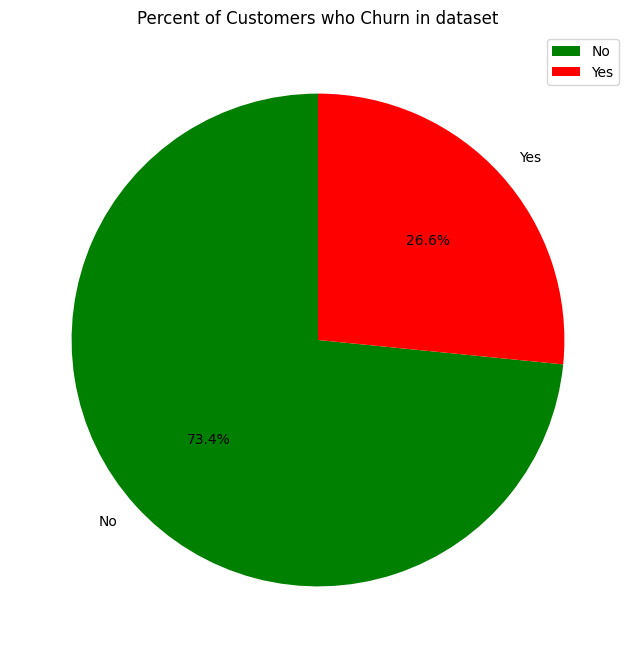

In [19]:
# Count the occurrences of each level
level_counts = df['Churn'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(level_counts, labels=level_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])

# Add a title
plt.title('Percent of Customers who Churn in dataset')
plt.legend()
plt.show()

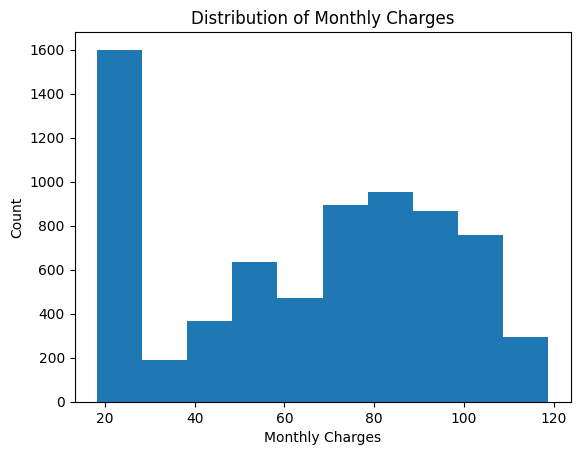

In [20]:
plt.hist(df['MonthlyCharges'])

plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.title('Distribution of Monthly Charges')
plt.show()

In [21]:
fig = px.histogram(df['MonthlyCharges'], title= 'Distribution of Monthly Charges')
fig.show()

# Observation: Monthly Charges Distribution
- Data set is not normally distributed.
- 1,180 customers pay between $18-$22 a month. These customers make up 16.7% of the customers. 
- 1,544 customers pay between $18-$26 a month. These customers make up 21.9% of the total customers. 


# EDA
- Churn and tenure? (Hypothesis Testing)
- Churn and Gender? (Hypothesis Testing)
- Churn and SeniorCitizen status? (Hypothesis Testing)
- Churn and Dependents? (Hypothesis Testing)
- Churn and payment method? (Hypothesis Testing)
- Churn and Internet Service? (Hypothesis Testing)

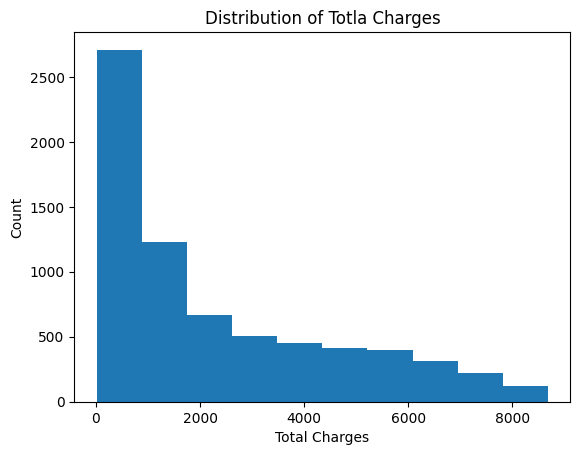

In [22]:
plt.hist(df['TotalCharges'])

plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.title('Distribution of Totla Charges')
plt.show()

In [23]:
# Calculating the number of people who churned
print(7043 * .266)

1873.438


# Observation: Distribution of Churn in dataset
- 26.6% of customers in the data set churned. 
- Roughly 1873 customers in this data set churned. That is a lot of lost revenue!

## Churn and Monthly Charges

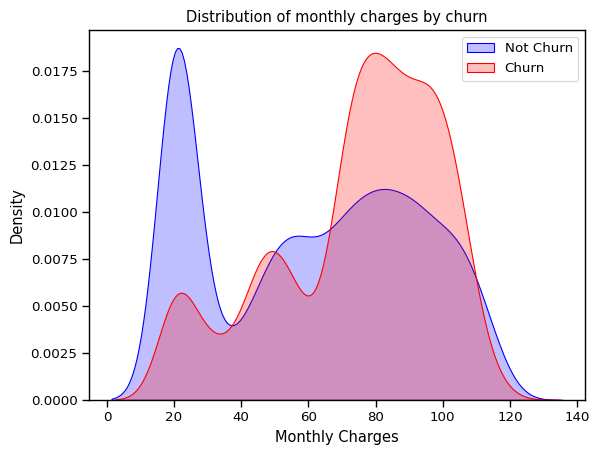

In [24]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Blue", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Red", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

## Observation
- By far, customers who churned were paying more per month than those who did not.
- Is there a reason for this?

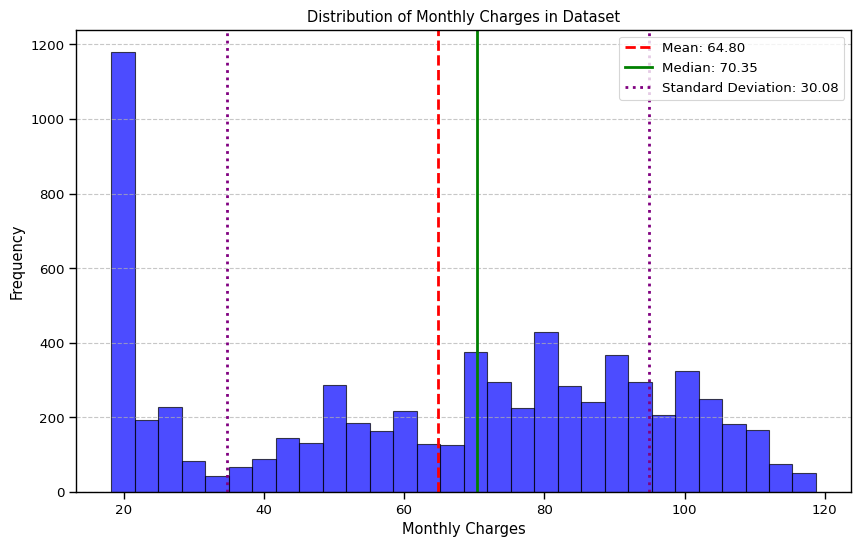

In [174]:
#Histogram
plt.figure(figsize=(10,6))
plt.hist(df['MonthlyCharges'], bins=30, color='blue', edgecolor='black',alpha = 0.7)


# Add vertical lines for mean, median, and standard deviation
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='solid', linewidth=2, label=f'Median: {median:.2f}')
plt.axvline(mean + std_dev, color='purple', linestyle='dotted', linewidth=2, label=f'Standard Deviation: {std_dev:.2f}')
plt.axvline(mean - std_dev, color='purple', linestyle='dotted', linewidth=2)


plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Charges in Dataset')

plt.legend()

# Grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

## Churn Contract Type and Average Monthly Charges

In [25]:
Churn_Contract_Charges = df.groupby(['Churn', 'Contract'])['MonthlyCharges'].mean().reset_index()

Churn_Contract_Charges.head(6)

,Churn,Contract,MonthlyCharges
0,No,Month-to-month,61.462635
1,No,One year,62.540926
2,No,Two year,60.112798
3,Yes,Month-to-month,73.019396
4,Yes,One year,85.050904
5,Yes,Two year,86.777083


In [26]:

fig = px.bar(
    Churn_Contract_Charges,
    x='Contract',
    y='MonthlyCharges',
    color='Churn',
    barmode='group',
    title='Average Monthly Charges by Contract Type and Churn Status',
    labels={'MonthlyCharges': 'Avg Monthly Charges ($)'}
)
fig.update_traces(
    texttemplate='%{y:.2f}',
    textposition='outside'
)
fig.update_layout(
    yaxis=dict(showgrid=True, gridcolor='gray'),
    font=dict(size=16),
    width=800,
    height=600
)

fig.show()


In [27]:
Churn_Contract_Charges.head(6)

,Churn,Contract,MonthlyCharges
0,No,Month-to-month,61.462635
1,No,One year,62.540926
2,No,Two year,60.112798
3,Yes,Month-to-month,73.019396
4,Yes,One year,85.050904
5,Yes,Two year,86.777083


In [28]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
Churn_PaymentMethod_AvgMonthlyCharges = df.groupby(['Churn', 'PaymentMethod'])['MonthlyCharges'].mean().reset_index()

Churn_PaymentMethod_AvgMonthlyCharges.head(14)

,Churn,PaymentMethod,MonthlyCharges
0,No,Bank transfer (automatic),65.061604
1,No,Credit card (automatic),64.568813
2,No,Electronic check,74.232032
3,No,Mailed check,41.439506
4,Yes,Bank transfer (automatic),77.875581
5,Yes,Credit card (automatic),77.356034
6,Yes,Electronic check,78.700980
7,Yes,Mailed check,54.557143


In [30]:
#Displaying difference in means grouped by socio-economic status and parental level of education
fig = px.bar(
    Churn_PaymentMethod_AvgMonthlyCharges, 
    x='PaymentMethod', 
    y='MonthlyCharges', 
    color='Churn', 
    barmode='group', 
    title='Churn by Average Monthly Charges and Payment Method'
)

fig.update_traces(
    texttemplate='%{y:.2f}',
    textposition='outside'
)
fig.update_layout(
    yaxis=dict(showgrid=True, gridcolor='gray'),
    font=dict(size=16),
    width=900,
    height=900
)

fig.show()

## Observations: Churn, Contract Type and Average Monthly Charges
- On average customers who churned were paying more per month than those who did not, this was true regardless of the type of contract.
- Customers who were month-to-month and churned were paying on average $12 more per month than those who did not churn.
- Customers who were on a year conctract and churned were paying on average $23 more than customers on a year contract who did not churn. 
- Customers who churned and on a two year contract were on average paying $26 more than customers who did not churn and were on a two year contract. 

## Churn and Contract Type

In [31]:
Churn_Contract_Charges = df.groupby(['Churn', 'Contract']).size().reset_index(name='count')

In [32]:
Churn_Contract_Charges.head()

,Churn,Contract,count
0,No,Month-to-month,2220
1,No,One year,1306
2,No,Two year,1637
3,Yes,Month-to-month,1655
4,Yes,One year,166


In [170]:

fig = px.sunburst(
    Churn_Contract_Charges, 
    path=['Churn', 'Contract'], 
    values='count', 
    title='Churn Distribution by Contract Type'
)

# Update to show percentages along with labels
fig.update_traces(textinfo='label+value +percent entry')
font=dict(size=40),
fig.update_layout(width=800, height=800)

fig.show()

## Observation: Churn and Contract Type
- 27% of Telco customers in data set churned. 
- Of the 1869 customers (27%) who churned, 1655 (24%) of these were on a Month-to-month contract. 
- This is a cleary indicates that customers at risk of churning are on a Month-to-month contract. 
- Of the total customers who churned only 2% were on a year contract.
- Of the customers who churned only 1% were on a Two year contract.  

## Notes: Month-to-month customers are by far the most likely to churn, therefore I should explore just this subset of customers to try and uncover additional insights. 

In [34]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

In [35]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [36]:
#Analyze just lunch and scores
month_to_month = df
month_to_month = month_to_month.drop(columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges'])


In [37]:
month_to_month.head()

,Contract,MonthlyCharges,Churn
0,Month-to-month,29.85,No
1,One year,56.95,No
2,Month-to-month,53.85,Yes
3,One year,42.30,No
4,Month-to-month,70.70,Yes


In [38]:
# Focusing on just Month-to-month since these are the customers who churn more.
month_to_month_df = df[df['Contract']== 'Month-to-month']

In [39]:
month_to_month_df['Contract'].value_counts()

Contract
Month-to-month    3875
Name: count, dtype: int64

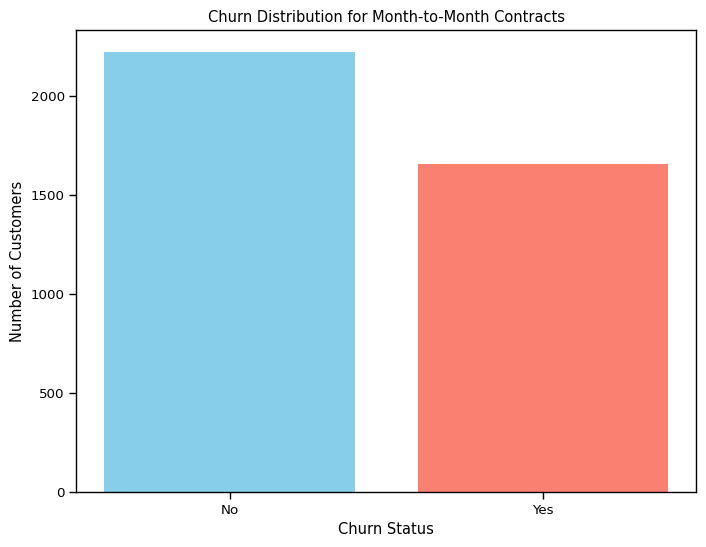

In [40]:
plt.figure(figsize=(8, 6))
churn_counts = month_to_month_df['Churn'].value_counts()
plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'salmon'])
plt.title('Churn Distribution for Month-to-Month Contracts')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.show()

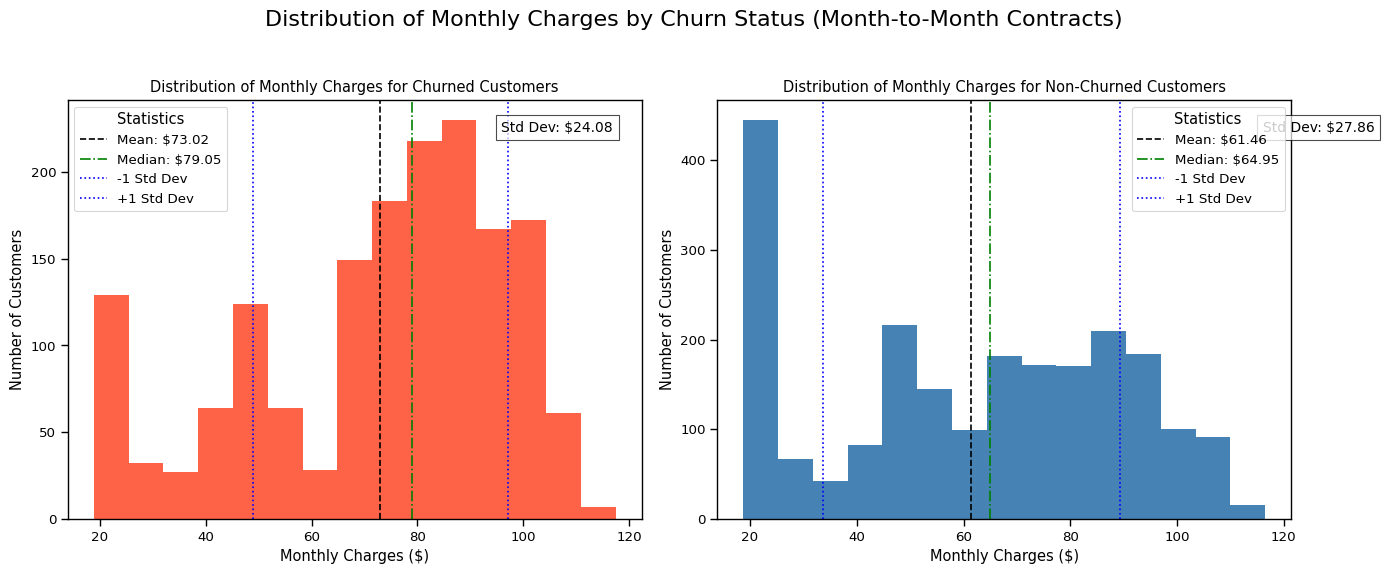

In [41]:

# Separate monthly charges for churned and non-churned customers
churn_yes_charges = month_to_month_df[month_to_month_df['Churn'] == 'Yes']['MonthlyCharges']
churn_no_charges = month_to_month_df[month_to_month_df['Churn'] == 'No']['MonthlyCharges']

# Compute statistics
def compute_stats(data):
    return np.mean(data), np.median(data), np.std(data)

yes_mean, yes_median, yes_std = compute_stats(churn_yes_charges)
no_mean, no_median, no_std = compute_stats(churn_no_charges)

# Create two separate histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for Churned Customers
ax1.hist(churn_yes_charges, bins=15, color='#FF6347')
ax1.set_title('Distribution of Monthly Charges for Churned Customers')
ax1.set_xlabel('Monthly Charges ($)')
ax1.set_ylabel('Number of Customers')
ax1.axvline(yes_mean, color='k', linestyle='--', label=f'Mean: ${yes_mean:.2f}')
ax1.axvline(yes_median, color='g', linestyle='-.', label=f'Median: ${yes_median:.2f}')
ax1.axvline(yes_mean - yes_std, color='blue', linestyle=':', label='-1 Std Dev')
ax1.axvline(yes_mean + yes_std, color='blue', linestyle=':', label='+1 Std Dev')
ax1.legend(title='Statistics')
ax1.text(0.95, 0.95, f'Std Dev: ${yes_std:.2f}', transform=ax1.transAxes,
         fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.7))

# Histogram for Non-Churned Customers
ax2.hist(churn_no_charges, bins=15, color='#4682B4')
ax2.set_title('Distribution of Monthly Charges for Non-Churned Customers')
ax2.set_xlabel('Monthly Charges ($)')
ax2.set_ylabel('Number of Customers')
ax2.axvline(no_mean, color='k', linestyle='--', label=f'Mean: ${no_mean:.2f}')
ax2.axvline(no_median, color='g', linestyle='-.', label=f'Median: ${no_median:.2f}')
ax2.axvline(no_mean - no_std, color='blue', linestyle=':', label='-1 Std Dev')
ax2.axvline(no_mean + no_std, color='blue', linestyle=':', label='+1 Std Dev')
ax2.legend(title='Statistics')
ax2.text(0.95, 0.95, f'Std Dev: ${no_std:.2f}', transform=ax2.transAxes,
         fontsize=10, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.7))

# Add a main title for the whole figure
fig.suptitle('Distribution of Monthly Charges by Churn Status (Month-to-Month Contracts)', fontsize=16)

# Adjust layout to prevent titles from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show plot
plt.show()


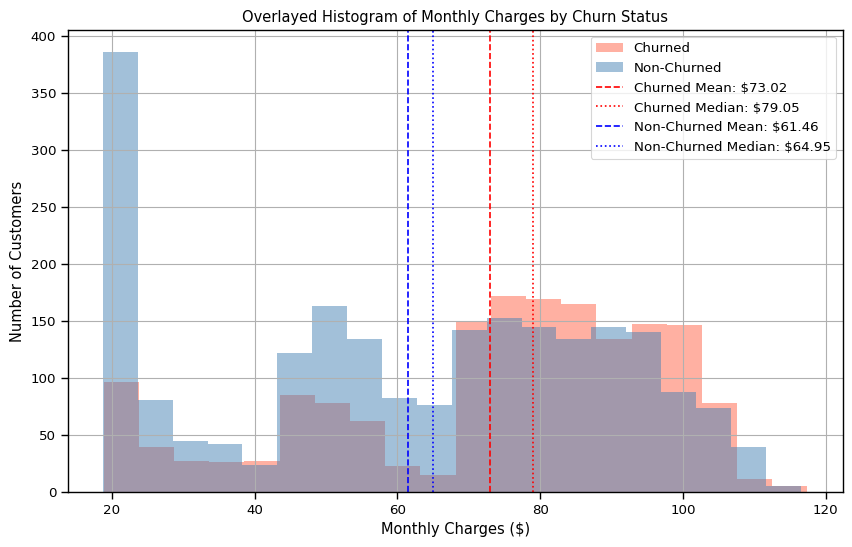

In [43]:
plt.figure(figsize=(10, 6))

# Overlayed histograms
plt.hist(churn_yes_charges, bins=20, color='#FF6347', alpha=0.5, label='Churned')
plt.hist(churn_no_charges, bins=20, color='#4682B4', alpha=0.5, label='Non-Churned')

# Mean and median for churned
plt.axvline(yes_mean, color='red', linestyle='--', label=f'Churned Mean: ${yes_mean:.2f}')
plt.axvline(yes_median, color='red', linestyle=':', label=f'Churned Median: ${yes_median:.2f}')

# Mean and median for non-churned
plt.axvline(no_mean, color='blue', linestyle='--', label=f'Non-Churned Mean: ${no_mean:.2f}')
plt.axvline(no_median, color='blue', linestyle=':', label=f'Non-Churned Median: ${no_median:.2f}')

# Title and labels
plt.title('Overlayed Histogram of Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(True)
plt.show()


## Observations
- Based on these visualizations it is clear that customers who are on a month-to-month contract and pay between $20-$30 a month churn at rates far lower to customers who are month-to month and pay $70-$100.
- This is great insight since it can help Telco focus intervention methods on customers who are month-to-month paying between $70-$100.
- Amount paid per month seems to be a big indicator in identifying customer churn.  

In [44]:
#print(lunch['math score'].mean())
grouped_month_to_month = month_to_month.groupby('Contract')
mean_by_churn = grouped_month_to_month['MonthlyCharges'].mean()
print(mean_by_churn)#display mean score of both groups

fig = px.box(month_to_month, x='Contract',y='MonthlyCharges', color='Churn', title= 'Churn by Contract and Average Monthly Charges')#Use boxplot to visualize IQR, Median, Outliers and Range.
# Add grid lines to the x and y axes
fig.update_layout(
    xaxis=dict(showgrid=True, gridcolor='gray'),  # X-axis grid
    yaxis=dict(showgrid=True, gridcolor='gray')   # Y-axis grid
)

fig.show()

Contract
Month-to-month    66.398490
One year          65.079416
Two year          60.872374
Name: MonthlyCharges, dtype: float64


## Insights from box plots:
- More than 50% of customers who churned and were Month-to-month were paying above the median price ($64.95) of Non-Churn customers.
- Over 75% of customers who churned and were on a one year contract were paying on average above median price ($64.85) of Non-Churn customers.
- Same is true for customers who churned and were on a two year contract. 
- We can capture a great deal of customers who will churn by setting our threshold to the third quartile of each contract type for Non-Churn customers.

In [45]:
# Calculating statistics
mean = np.mean(df['MonthlyCharges'])
median = np.median(df['MonthlyCharges'])
std_dev = np.std(df['MonthlyCharges'])

In [47]:
month_to_month_df = df[df['Contract'] == 'Month-to-month']

In [48]:
month_to_month_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No


In [49]:
month_to_month_churn = month_to_month_df.groupby('Churn')['MonthlyCharges']

In [50]:
mean_charges = month_to_month_churn.mean()
print(mean_charges)

Churn
No     61.462635
Yes    73.019396
Name: MonthlyCharges, dtype: float64


## Hypothesis Testing
The difference in mean charges between customers whou churned and those who did not is due to random chance. 

Churn
No     Axes(0.125,0.11;0.775x0.77)
Yes    Axes(0.125,0.11;0.775x0.77)
Name: MonthlyCharges, dtype: object

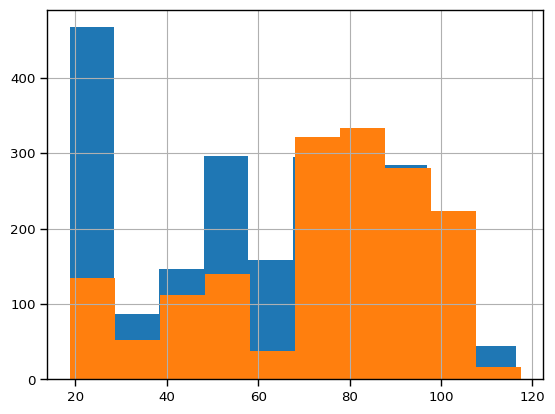

In [52]:
month_to_month_churn.hist()

## Churn and Average Monthly Charges

# Churn and Average Monthly Charges

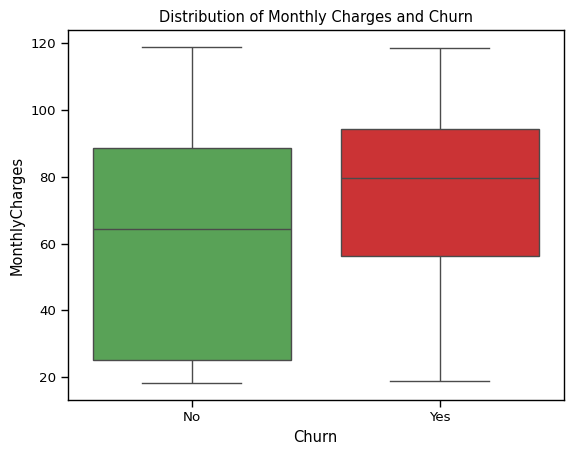

In [53]:
sns.boxplot(x='Churn', y='MonthlyCharges', palette= ['#4daf4a', '#e41a1c'],data=df)

plt.title('Distribution of Monthly Charges and Churn')
plt.show()

In [54]:
Churn_AvgMonthlyCharges = df.groupby('Churn')['MonthlyCharges'].mean().reset_index()

# Observation: 
- On average customers who churned paid approximately $13 more dollars per month than thos who did not churn.


In [56]:
Churn_Tenure_Charges = df.groupby(['Churn', 'tenure'])['MonthlyCharges'].mean().reset_index()

In [57]:

fig = px.bar(
    Churn_Tenure_Charges,
    x='tenure',
    y='MonthlyCharges',
    color='Churn',
    barmode='group',
    title='Average Monthly Charges by Tenure (Months) and Churn Status',
    labels={'MonthlyCharges': 'Avg Monthly Charges ($)'}
)
fig.update_traces(
    texttemplate='%{y:.2f}',
    textposition='outside'
)
fig.update_layout(
    yaxis=dict(showgrid=True, gridcolor='gray'),
    font=dict(size=16),
    width=800,
    height=600
)

fig.show()

## Observation:
- Regardless of tenure, customers who churned were on average paying more than their counter parts who did not churn. 

# Observations: Churn by Average Monthly Charges and Numbuer of Months as a Customer
- On average customer who paid more per month were more likely to churn.
- Is there a reason for higher charges?
- Is this difference in average monthly charges statistically significant?

# Hypothesis Testing
Null: The differnece in average monthly charges is due to random chance. 

## Churn and Payment Method

In [58]:
Churn_Payment_Method = df.groupby(['Churn', 'PaymentMethod']).size().reset_index(name='count')

In [171]:

fig = px.sunburst(
    Churn_Payment_Method, 
    path=['Churn', 'PaymentMethod'], 
    values='count', 
    title='Customer Distribution by Churn and Payment Method'
)

# Update to show percentages along with labels
fig.update_traces(textinfo='label +percent entry')
font=dict(size=40),
fig.update_layout(width=800, height=800)

fig.show()

# Observation: Customer Churn and Payment Method
- Of the 15% of customers who churned used Electronic check as their payment method. This far exceeds the other categories of customers who churned which were almost identical. 

In [60]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="Customer Payment Method distribution and Churn")
fig.update_layout(width=900, height=600, bargap=0.1)
fig.show()

## Churn and Gender

In [61]:
Churn_Gender = df.groupby(['Churn', 'gender']).size().reset_index(name='count')

In [62]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [63]:
fig = px.sunburst(
    Churn_Gender, 
    path=['Churn', 'gender'],
    color='Churn', 
    values='count', 
    title='Customer Distribution by Churn and Gender'
)

# Update to show percentages along with labels
fig.update_traces(textinfo='label +percent entry')
font=dict(size=40),
fig.update_layout(width=800, height=800)

fig.show()

# Observations: Churn and Gender
- Gender appears to have no association to churn rate. Both categories are roughly identical.

## Churn and Senior citizen status

In [64]:
Churn_SeniorCitizen = df.groupby(['Churn', 'SeniorCitizen']).size().reset_index(name='count')

In [65]:
Churn_SeniorCitizen.head(6)

,Churn,SeniorCitizen,count
0,No,0,4497
1,No,1,666
2,Yes,0,1393
3,Yes,1,476


In [66]:
fig = px.sunburst(
    Churn_SeniorCitizen, 
    path=['Churn', 'SeniorCitizen'], 
    values='count', 
    title='Customer Distribution by Churn and Senior Citizen Status'
)

# Update to show percentages along with labels
fig.update_traces(textinfo='label +value+percent entry')
font=dict(size=40),
fig.update_layout(width=800, height=800)

fig.show()

# Observation:
- Of the 1869 customers that churned, 476 (7%) were Senior Citizens. 

# EDA

- Churn and Dependents? (Hypothesis Testing)
- Churn and Internet Service? (Hypothesis Testing)

## Churn and if customer had dependents

In [67]:
fig= px.histogram(df, x="Churn", color='Dependents', barmode="group", title='Distribution of Churn and Dependents')
fig.update_layout(width=800, height= 500, bargap=0.2)
fig.show()

## Observation
- Of customers who did not churn 65% did not have dependents
- Of customers who did churn 82.5% did not have dependents.
- This shows customers who do not have dependents churn at slightly higher rates. 

In [68]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [175]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_traces(
    texttemplate='%{y:.2f}',
    textposition='outside'
)
fig.update_layout(
    yaxis=dict(showgrid=True, gridcolor='gray'),
    font=dict(size=16),
    width=1200,
    height=800,
    #margin=dict(l=40,r=40, t=60, b=40)
)

fig.update_layout(title_text= 'Churn Distribution based on Gender and type of Internet Service')

fig.show()

## Observations:
- Regardless of Gender customers where far more likely to churn if they had Fiber optic as an Internet service.
- This strongly suggest that customers with Fiber optic internet service were disatified by the quality.
- 35% of Females who did not churn had Fiber optic as an internet service.
- 70% of Females who DID churn had Fiber optic as an internet service. 

This clearly shows that having Fiber optic as an internet service has a high association with Churn. 

## Churn distribution and status of Customers with and without Partners 

In [70]:
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

## Observations:
- Customers who churned were approximately twice as likely to not have a Partner as their counter parts.

## Online Security and Churn

In [71]:
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn and Online Security</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

## Observation
- A vast majority of customers who churned did not have Online Security.

## Churn and Paperless Billing

In [72]:
fig = px.histogram(df, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution and Paperless Billing</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

## Observations
- Customers who churned were fare more likely to be enrolled in Paperless Billing.

## Churn and TechSupport

In [73]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution and TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

## Observation
- Customers who churned were far more likely to have No tech support. 

## Churn and Phone Service

In [74]:
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Chrun distribution and Phone Service</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

## Observation
- Customers who churned ...

In [75]:
df.value_counts()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling  PaymentMethod              MonthlyCharges  TotalCharges  Churn
Male    0              No       No          1       Yes           No             No               No internet service  No internet service  No internet service  No internet service  No internet service  No internet service  Month-to-month  No                Mailed check               20.05           20.05         No       3
                                                                                                                                                                                                                                                                                             20.20           20.20         No       3
Female  0              No  

## Corrleation Matrix
- In order to have an accurate correlation matrix I will have to make sure all of my data is numeric.
- I will have to mannually encode categorical and ordinal features to prepare my data for Machine Learning. 

# 4. Preprocessing

In [76]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [77]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Binary columns
- Gender -
- SeniorCitizen -
- Partner -
- Dependent -
- PhoneService -
- OnlineSecurity 
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- PaperlessBilling
- Churn

## Non Binary
- MultipleLines
- InternetService
- Contract Type
- PaymentMthod

In [78]:
df_encoded = df.copy()

In [79]:
# females will be 0 and males 1 
encode_gen = {'Female':0, 'Male':1}

df_encoded['gender'] = df_encoded['gender'].map(encode_gen)

In [80]:
# Encode Partner
encode_partner = {'No':0, 'Yes':1}

df_encoded['Partner'] = df_encoded['Partner'].map(encode_partner)

In [81]:
# Encode Dependent
encode_dependent = {'No':0, 'Yes':1}

df_encoded['Dependents'] = df_encoded['Dependents'].map(encode_dependent)

In [82]:
# Encode PhoneService
encode_phone = {'No':0, 'Yes':1}

df_encoded['PhoneService'] = df_encoded['PhoneService'].map(encode_phone)

In [83]:
# I have to clean Multiplelines coulumn
encode_Multiple = {'No':0, 'No phone service':0, 'Yes':1}

df_encoded['MultipleLines'] = df_encoded['MultipleLines'].map(encode_Multiple)



In [84]:
# Encode InternetService
# 0 = No
# 1 = DSL
# 2 = Fiber optic
df_encoded['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

In [85]:
# One-hot encoding 
#encode_Internet = {'No':0, 'DSL':1, 'Fiber optic':2}

df_encoded = pd.get_dummies(df_encoded, columns=['InternetService'], prefix='Internet', drop_first=True)



In [86]:
df_encoded['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

In [87]:
encode_OnlineSecurity = {'No':0,'No internet service':0, 'Yes':1}

df_encoded['OnlineSecurity'] = df_encoded['OnlineSecurity'].map(encode_OnlineSecurity)

In [88]:
# Encode OnlineBackup
encode_OnlineBackup = {'No':0,'No internet service':0, 'Yes':1}

df_encoded['OnlineBackup'] = df_encoded['OnlineBackup'].map(encode_OnlineBackup)

In [89]:
# Encode OnlineBackup
encode_DeviceProtection = {'No':0,'No internet service':0, 'Yes':1}

df_encoded['DeviceProtection'] = df_encoded['DeviceProtection'].map(encode_DeviceProtection)

In [90]:
# Encode TechSupport
encode_TechSupport = {'No':0,'No internet service':0, 'Yes':1}

df_encoded['TechSupport'] = df_encoded['TechSupport'].map(encode_TechSupport)

In [91]:
# Encode StreamingTV
encode_StreamingTV = {'No':0,'No internet service':0, 'Yes':1}

df_encoded['StreamingTV'] = df_encoded['StreamingTV'].map(encode_StreamingTV)

In [92]:
# Encode StreamingMovies
encode_StreamingMovies = {'No':0,'No internet service':0, 'Yes':1}

df_encoded['StreamingMovies'] = df_encoded['StreamingMovies'].map(encode_StreamingMovies)

In [93]:
# Encode PaperlessBilling
encode_PaperlessBilling = {'No':0, 'Yes':1}

df_encoded['PaperlessBilling'] = df_encoded['PaperlessBilling'].map(encode_PaperlessBilling)

In [94]:
df_encoded['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

In [95]:
# Encode PayementMethod  
df_encoded = pd.get_dummies(df_encoded, columns=['PaymentMethod'], prefix='PayMethod')


#encode_PaymentMethod = {'Credit card (automatic)':0, 'Bank transfer (automatic)':1, 'Mailed check': 2, 'Electronic check':3}

#df_encoded['PaymentMethod'] = df_encoded['PaymentMethod'].map(encode_PaymentMethod)

In [96]:
# Encode Payement Method based on vaule counts: Electronic =  

df_encoded = pd.get_dummies(df_encoded, columns=['Contract'], prefix='Contract')


#encode_Contract = {'Month-to-month':0, 'One year':1, 'Two year': 2}

#df_encoded['Contract'] = df_encoded['Contract'].map(encode_Contract)

In [97]:
# Encode Churn
encode_Churn = {'No':0, 'Yes':1}

df_encoded['Churn'] = df_encoded['Churn'].map(encode_Churn)

In [98]:
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn,Internet_Fiber optic,Internet_No,PayMethod_Bank transfer (automatic),PayMethod_Credit card (automatic),PayMethod_Electronic check,PayMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,0,1,0,1,0,0,0,1,0,...,0,False,False,False,False,True,False,True,False,False
1,1,0,0,0,34,1,0,1,0,1,...,0,False,False,False,False,False,True,False,True,False
2,1,0,0,0,2,1,0,1,1,0,...,1,False,False,False,False,False,True,True,False,False
3,1,0,0,0,45,0,0,1,0,1,...,0,False,False,True,False,False,False,False,True,False
4,0,0,0,0,2,1,0,0,0,0,...,1,True,False,False,False,True,False,True,False,False


In [99]:
df_encoded.isna().sum()

gender                                 0
SeniorCitizen                          0
Partner                                0
Dependents                             0
tenure                                 0
PhoneService                           0
MultipleLines                          0
OnlineSecurity                         0
OnlineBackup                           0
DeviceProtection                       0
TechSupport                            0
StreamingTV                            0
StreamingMovies                        0
PaperlessBilling                       0
MonthlyCharges                         0
TotalCharges                           0
Churn                                  0
Internet_Fiber optic                   0
Internet_No                            0
PayMethod_Bank transfer (automatic)    0
PayMethod_Credit card (automatic)      0
PayMethod_Electronic check             0
PayMethod_Mailed check                 0
Contract_Month-to-month                0
Contract_One yea

## Correlation Matrix


In [100]:
plt.figure(figsize=(25, 10))

correlation_matrix = df_encoded.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))





<Figure size 2500x1000 with 0 Axes>

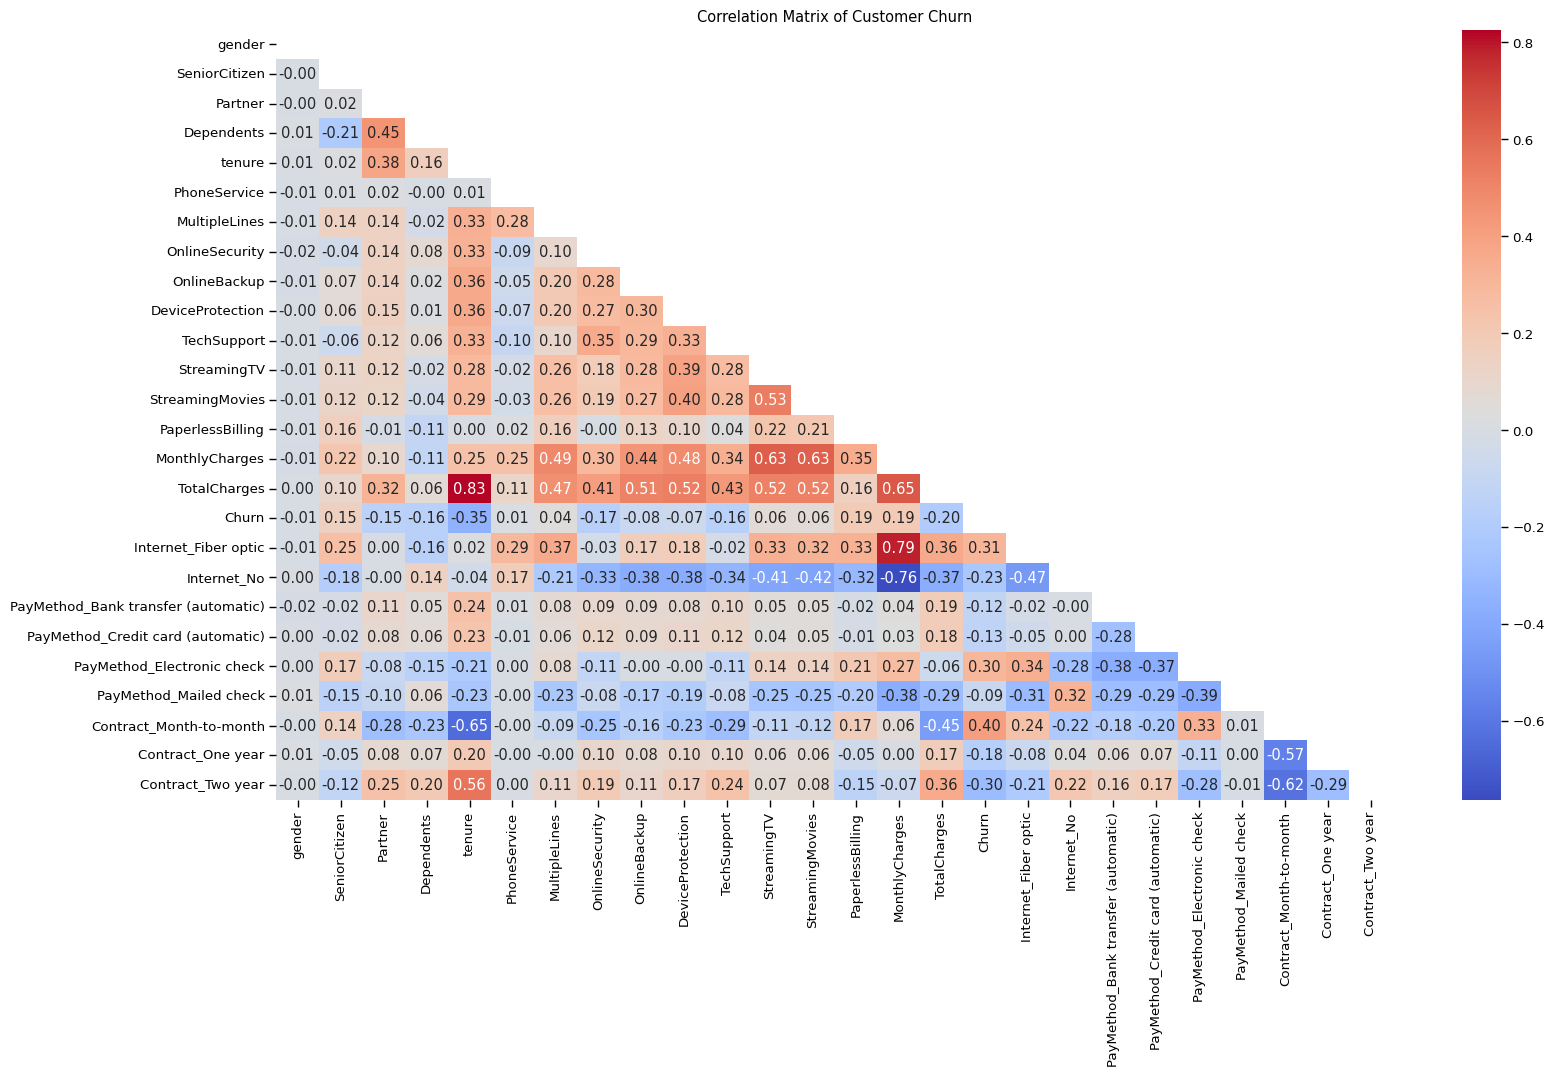

In [173]:
#Plot the Correlation Matrix
plt.figure(figsize=(18, 10))

#Mask to truncate heatmap to reduce reduncancy of data visulaization. 
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f", mask=mask)
plt.title('Correlation Matrix of Customer Churn')

plt.show()

### Observations:
Churn and Positive associations 

- Churn is positively corrlelated with Contract being Month-to-month at .40
- Churn is positively correlated with Payment Method being Electronic check at .30
- Churn is positively correlated with Internet being Fiber optic at .31 
- Internet Fiber Optic is highly postively correlated with higher Monthly charges at .79

Churn and Negative associations

- Churn is negatively correlated with Contract type being Two year at -.30
- Churn is negatively correlated with Contract type being One year at -.18
- Churn is negatively correlated with Not having internet service at -.23


## Key insights
- Monthly Charges are positively correlated with Internet being Fiber optic at .79
- Monthly Charges are negatively correlated with Internet being Fiber optic at -.79
This provides evidence that suggests that customers who have Fiber optic as a service will pay more per month. This is vital information since in EDA I discovered that customers who churned were paying more per month on average. 

- Senior Citizens are correlated with Internet Service being Fiber optic at .25
- Senior Citizens are correlated with Contratc type being Month-to-month at .14
- Senior Citizens are correlated with Payement method being Electronic check at .17



In [102]:
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn,Internet_Fiber optic,Internet_No,PayMethod_Bank transfer (automatic),PayMethod_Credit card (automatic),PayMethod_Electronic check,PayMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,0,1,0,1,0,0,0,1,0,...,0,False,False,False,False,True,False,True,False,False
1,1,0,0,0,34,1,0,1,0,1,...,0,False,False,False,False,False,True,False,True,False
2,1,0,0,0,2,1,0,1,1,0,...,1,False,False,False,False,False,True,True,False,False
3,1,0,0,0,45,0,0,1,0,1,...,0,False,False,True,False,False,False,False,True,False
4,0,0,0,0,2,1,0,0,0,0,...,1,True,False,False,False,True,False,True,False,False


# Scaling features

In [103]:
from sklearn.preprocessing import StandardScaler

continuous_numeric_columns = ['MonthlyCharges', 'TotalCharges','tenure']

# Apply standard scaling
scaler = StandardScaler()
df_encoded[continuous_numeric_columns] = scaler.fit_transform(df_encoded[continuous_numeric_columns])

In [104]:
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn,Internet_Fiber optic,Internet_No,PayMethod_Bank transfer (automatic),PayMethod_Credit card (automatic),PayMethod_Electronic check,PayMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,0,1,0,-1.280248,0,0,0,1,0,...,0,False,False,False,False,True,False,True,False,False
1,1,0,0,0,0.064303,1,0,1,0,1,...,0,False,False,False,False,False,True,False,True,False
2,1,0,0,0,-1.239504,1,0,1,1,0,...,1,False,False,False,False,False,True,True,False,False
3,1,0,0,0,0.512486,0,0,1,0,1,...,0,False,False,True,False,False,False,False,True,False
4,0,0,0,0,-1.239504,1,0,0,0,0,...,1,True,False,False,False,True,False,True,False,False


# 5. Modeling

## Train Test Split

In [105]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(['Churn'], axis=1) 

y = df_encoded['Churn']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Logistic Regression Base Model

In [106]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = model.predict(X_test)



print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7895335608646189
Precision: 0.6151832460732984
Recall: 0.5131004366812227
F1 Score: 0.5595238095238095
Confusion Matrix:
 [[1153  147]
 [ 223  235]]


## Observation on Base LR model 
- Accuracy is decent at 78%
- Precision is decent at 61%
- Recall is not great at 51%
- F1 Score is low at 56%

## Hyperparameter Tunning to improve Logistic Regression Model

In [108]:
from scipy.stats import uniform

In [109]:
# Hyperparameter grid
param_distributions = {
    'C': uniform(0.01, 100),  # C values between 0.01 and 100
    'penalty': ['l2'],  # Only L2 regularization since 'lbfgs' solver does not support L1
    'solver': ['lbfgs'],  # Solver choice
    'max_iter': [100, 200, 300]  # Number of iterations for convergence
}

In [110]:
from sklearn.model_selection import RandomizedSearchCV
# Initialize the RandomizedSearchCV with Logistic Regression
random_search = RandomizedSearchCV(
    LogisticRegression(multi_class='multinomial', random_state=22),
    param_distributions=param_distributions,
    n_iter=50,  # Number of random combinations to try
    scoring='accuracy',  # Optimize for accuracy
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=22,  # Ensure reproducibility
    n_jobs=-1  # Use all available cores
)

In [111]:
# Fit Randomized Search on training data

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed i

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(multi_class='multinomial',
                                                random_state=22),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x13afa0b00>,
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l2'],
                                        'solver': ['lbfgs']},
                   random_state=22, scoring='accuracy', verbose=1)

In [112]:
#Print best parameters

print('Best Parameters', random_search.best_params_)

#Print best cross-val score

print('Best Cross-Validation Score:', random_search.best_score_)

Best Parameters {'C': 85.92819985213441, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.8058422439454302


In [114]:
# Evaluate the best model on the test set
best_logreg_model = random_search.best_estimator_
y_pred = best_logreg_model.predict(X_test)

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Test Accuracy: 0.7912400455062572
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1300
           1       0.62      0.52      0.56       458

    accuracy                           0.79      1758
   macro avg       0.73      0.70      0.71      1758
weighted avg       0.78      0.79      0.79      1758

Confusion Matrix:
[[1153  147]
 [ 220  238]]


### Pre pd.getdummie() application Scores

Test Accuracy: 0.7906712172923777
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1300
           1       0.62      0.52      0.56       458

    accuracy                           0.79      1758
   macro avg       0.73      0.70      0.71      1758
weighted avg       0.78      0.79      0.78      1758

Confusion Matrix:
[[1153  147]
 [ 221  237]]

## Observations:
- Accuracy went up by 1% after hyperparameter tunning
- Model does great in predicting customers who will NOT churn, with an F1 score of .86
- Model still does poorly in predicting customers who WILL churn with an F1 score of .56

This could be due to class imbalance, might need to apply SMOTE. 


## Random Forest Classifier Model

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

Test Accuracy: 0.782707622298066
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1300
           1       0.61      0.47      0.53       458

    accuracy                           0.78      1758
   macro avg       0.72      0.68      0.69      1758
weighted avg       0.77      0.78      0.77      1758



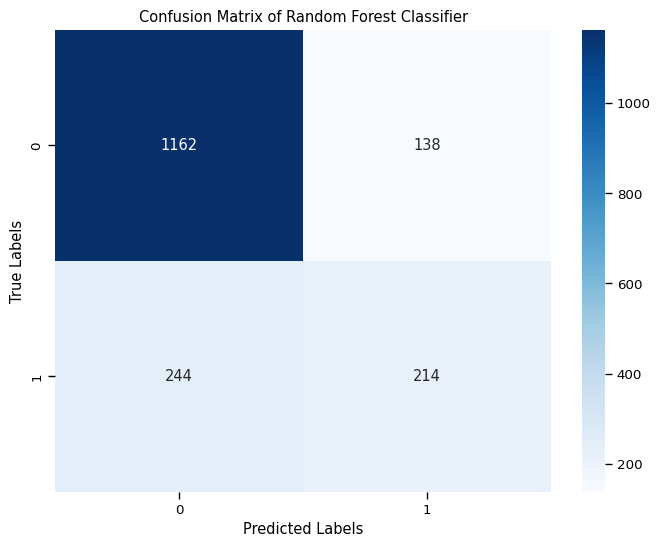

In [116]:
# Initialize the Random Forest Classifier with some basic parameters
# You can adjust n_estimators (number of trees) and max_depth (depth of each tree) for tuning
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, class_weight="balanced",random_state=22) #class_weight="balanced" because data set is not balanced. 

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix of Random Forest Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Pre dummies application
Test Accuracy: 0.7810011376564278
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1300
           1       0.61      0.46      0.52       458

    accuracy                           0.78      1758
   macro avg       0.71      0.68      0.69      1758
weighted avg       0.77      0.78      0.77      1758

## Hyperparameter tuning on RF Model

In [117]:
! pip install scikit-optimize


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [118]:
from skopt import BayesSearchCV

In [119]:
# Define the parameter search space
param_space = {
    'n_estimators': (50, 300),                   # Number of trees in the forest
    'max_depth': (5, 20),                        # Depth of each tree
    'min_samples_split': (2, 10),                # Minimum samples required to split an internal node
    'min_samples_leaf': (1, 4),                  # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None]     # Number of features to consider at each split
}

# Set up the Bayesian Optimization with cross-validation (cv=5)
bayes_search = BayesSearchCV(
    estimator=RandomForestClassifier(random_state=22),
    search_spaces=param_space,
    n_iter=32,                  # Number of iterations (try 32 to start, then adjust as needed)
    cv=5,                       # 5-fold cross-validation
    scoring='accuracy',         # Scoring metric (you can adjust based on goals)
    n_jobs=-1,                  # Use all processors
    verbose=2,
    random_state=22
)

# Fit the BayesSearchCV
bayes_search.fit(X_train, y_train)

# Print the best parameters and accuracy score
print("Best Parameters:", bayes_search.best_params_)
print("Best Cross-Validation Score:", bayes_search.best_score_)

# Use the best model to predict on the test set
best_rf_model = bayes_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=77; total time=   1.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=77; total time=   1.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=77; total time=   1.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=77; total time=   1.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=77; total time=   1.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=291; total time=   3.7s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=291; total time=   3.7s
[CV] END max_depth=8, max_features=sqrt, min_samp

## Observation:
- Best Parameters: OrderedDict({'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 133})

## Metrics for best RF Model

Test Accuracy: 0.7377701934015927
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1300
           1       0.50      0.79      0.61       458

    accuracy                           0.74      1758
   macro avg       0.70      0.75      0.71      1758
weighted avg       0.80      0.74      0.75      1758



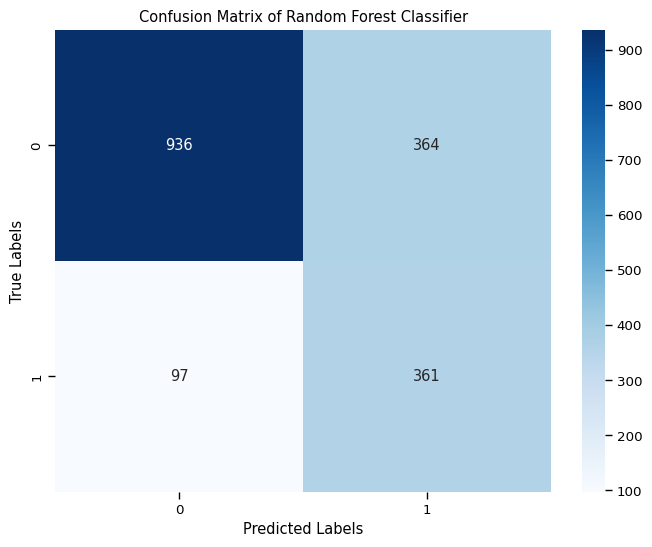

In [120]:
# Initialize the Random Forest Classifier with some basic parameters
# You can adjust n_estimators (number of trees) and max_depth (depth of each tree) for tuning
best_rf_model = RandomForestClassifier(n_estimators=133, max_depth=6, max_features='sqrt', min_samples_leaf=3, min_samples_split=4,class_weight="balanced",random_state=42) # Adding (class_weight="balanced") significantly improved results!

# Fit the model to the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_rf_model.classes_, yticklabels=best_rf_model.classes_)
plt.title("Confusion Matrix of Random Forest Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Observations:
- Great improvement in Recall scores for predicting customers who WILL Churn at .79
- The model did have to sacrifice some Recall in none Churn customers to improve in predicting customers who would Churn.  

## Understanding which features are important in predicting customer Churn based on Random Forest Model 

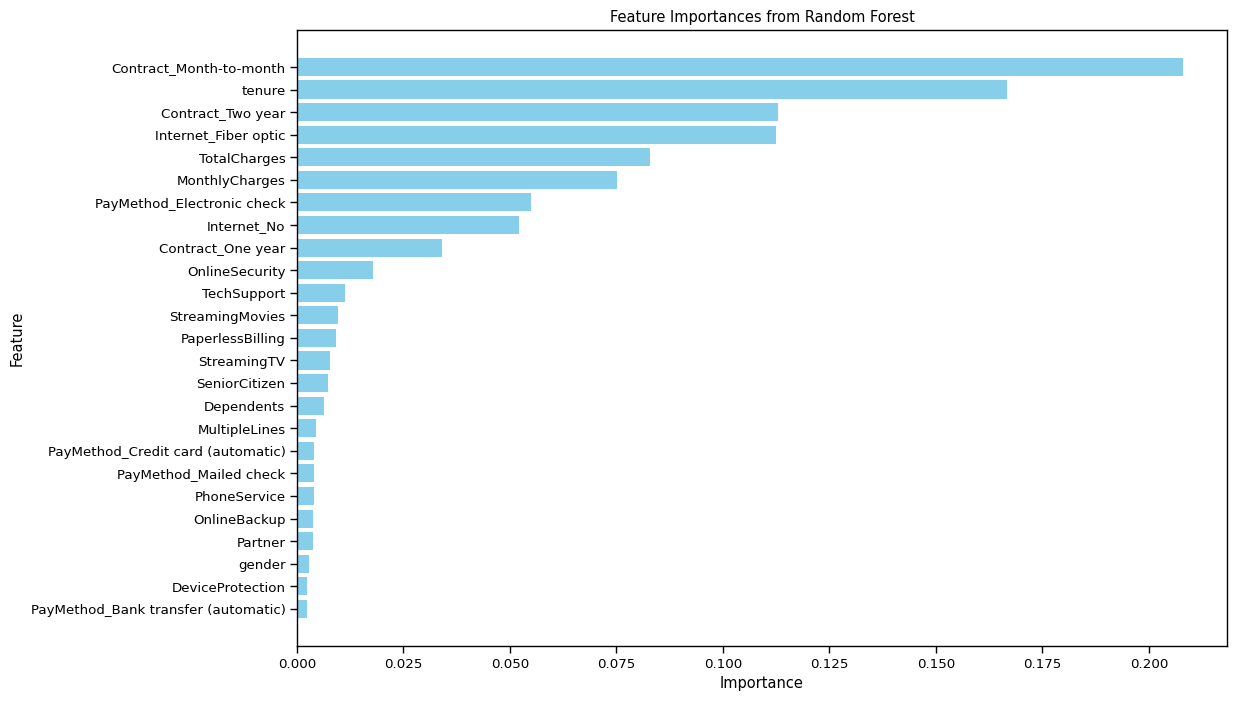

In [121]:
# Extract feature importances
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Highest importance on top
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## Observations: Feature Importance
- The most imporant feature that the model use to predict customer Churn was type of Contract Month-to-month. This aligns with what I discovered during EDA (Month-to-month contracts are most likely to churn)
- The second most important feature is Tenure, This is also align with what I discovered during EDA, The longer a customer has been with Telco the less likely they are to Churn. 
- Third most important features were Contract type being Two_year and Internet being Fiber optic. 

## Improving Model Recall Scores

- Model can be adjusted to improve is predictive power in identifying customers who will Churn which is repesented by recall in row 1(Yes Churn). However in doing so they will also capture some customers who are not likely to churn and this could lead to loss of time (inefficency). 


In [125]:
# Getting predicted probabilities
y_probs = best_rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Setting lower threshold of 0.3 for higher recall
threshold = 0.37
y_pred_adjusted = (y_probs >= threshold).astype(int)

# Evaluating the model with the adjusted threshold
print("Classification Report (Adjusted Threshold):")
print(classification_report(y_test, y_pred_adjusted))

# Confusion matrix
conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
print("Confusion Matrix (Adjusted Threshold):\n", conf_matrix_adjusted)

Classification Report (Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.94      0.60      0.74      1300
           1       0.44      0.90      0.59       458

    accuracy                           0.68      1758
   macro avg       0.69      0.75      0.67      1758
weighted avg       0.81      0.68      0.70      1758

Confusion Matrix (Adjusted Threshold):
 [[785 515]
 [ 47 411]]


### Key Insight
- With this adjusment model can not correctly capture 90% of customers who are at risk of Churning!

## Using SMOTE to improve model perfomrance

In [126]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 1. Split data first (important to avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. Apply SMOTE only to the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Optional: Check new class distribution
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_res))

Before SMOTE: Counter({0: 4130, 1: 1495})
After SMOTE: Counter({0: 4130, 1: 4130})


In [130]:
S_model = RandomForestClassifier(n_estimators=50, max_depth=None, class_weight="balanced",random_state=22)
S_model.fit(X_train_res, y_train_res)

# Evaluate on original test set
y_pred = S_model.predict(X_test)

Test Accuracy: 0.7647476901208244
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1033
           1       0.55      0.64      0.59       374

    accuracy                           0.76      1407
   macro avg       0.71      0.72      0.71      1407
weighted avg       0.78      0.76      0.77      1407



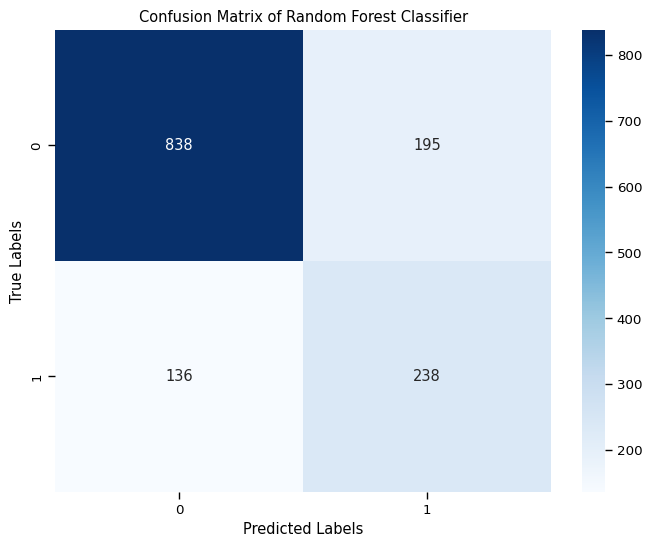

In [131]:
# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=S_model.classes_, yticklabels=S_model.classes_)
plt.title("Confusion Matrix of Random Forest Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Metrics Pre get_dummies() adjustment
Test Accuracy: 0.7654584221748401
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1033
           1       0.55      0.64      0.59       374

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.71      1407
weighted avg       0.78      0.77      0.77      1407

## Hyperparameter tunning after SMOTE

In [132]:
# Define the parameter search space
param_space = {
    'n_estimators': (50, 300),                   # Number of trees in the forest
    'max_depth': (5, 20),                        # Depth of each tree
    'min_samples_split': (2, 10),                # Minimum samples required to split an internal node
    'min_samples_leaf': (1, 4),                  # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None]     # Number of features to consider at each split
}

# Set up the Bayesian Optimization with cross-validation (cv=5)
bayes_search = BayesSearchCV(
    estimator=RandomForestClassifier(random_state=22),
    search_spaces=param_space,
    n_iter=32,                  # Number of iterations (try 32 to start, then adjust as needed)
    cv=5,                       # 5-fold cross-validation
    scoring='recall',         # Scoring metric (you can adjust based on goals)
    n_jobs=-1,                  # Use all processors
    verbose=2,
    random_state=22
)

# Fit the BayesSearchCV
bayes_search.fit(X_train_res, y_train_res)

# Print the best parameters and accuracy score
print("Best Parameters:", bayes_search.best_params_)
print("Best Cross-Validation Score:", bayes_search.best_score_)

# Use the best model to predict on the test set
best_rf_model = bayes_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=77; total time=   1.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=77; total time=   1.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=77; total time=   1.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=77; total time=   1.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=77; total time=   1.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=291; total time=   5.5s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=291; total time=   5.5s
[CV] END max_depth=8, max_features=sqrt, min_samp

Test Accuracy: 0.7569296375266524
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82      1033
           1       0.53      0.70      0.61       374

    accuracy                           0.76      1407
   macro avg       0.71      0.74      0.71      1407
weighted avg       0.79      0.76      0.77      1407



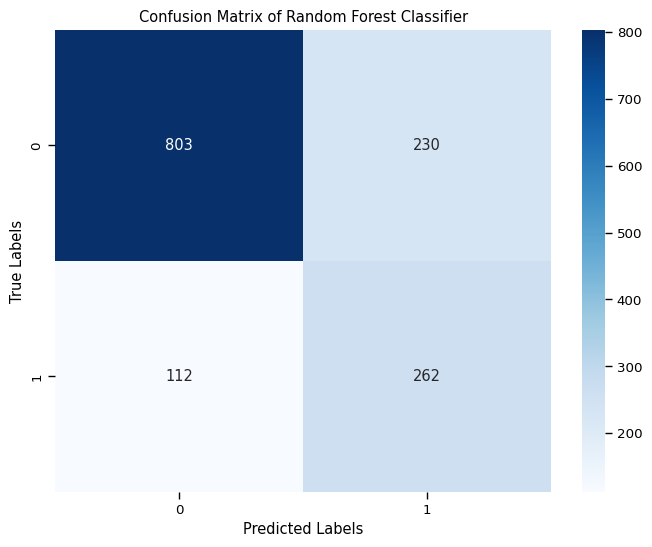

In [133]:
# Initialize the Random Forest Classifier with some basic parameters
# You can adjust n_estimators (number of trees) and max_depth (depth of each tree) for tuning
best_SRF_model = RandomForestClassifier(n_estimators=300, max_depth=13, max_features='sqrt', min_samples_leaf=1, min_samples_split=2,class_weight="balanced",random_state=42) # Adding (class_weight="balanced") significantly improved results!

# Fit the model to the training data
best_SRF_model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = best_SRF_model.predict(X_test)

# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_SRF_model.classes_, yticklabels=best_SRF_model.classes_)
plt.title("Confusion Matrix of Random Forest Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Metrics Pre-get.dummies() adjustment
Test Accuracy: 0.7590618336886994
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1033
           1       0.54      0.68      0.60       374

    accuracy                           0.76      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.78      0.76      0.77      1407

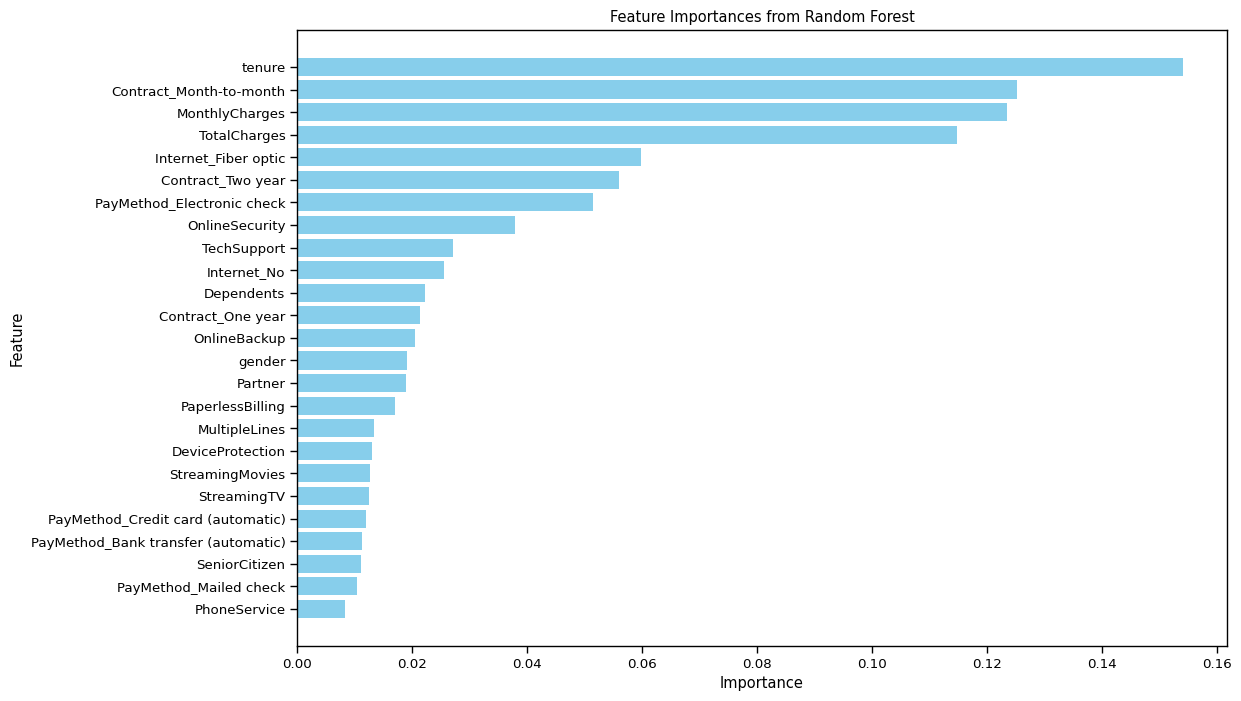

In [134]:
# Extract feature importances
feature_importances = best_SRF_model.feature_importances_

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Highest importance on top
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## Observations: Best RF model with SMOTE
- The most important feature after SMOTE was Tenure.
- Second most important feature after SMOTE was Contract being Month-to-month.
- Third most important feature after SMOTE was Monthly Charges.
- Fourth most important feature after SMOTE was Total Charges.

- This does not surpriese me as it is pretty consistent with what I discovered during Exploratory Data Analysis. 

### Threshold Adjustment to improve Recall


In [137]:
# Getting predicted probabilities
y_probs = best_SRF_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Setting lower threshold of 0.3 for higher recall
threshold = 0.22
y_pred_adjusted = (y_probs >= threshold).astype(int)

# Evaluating the model with the adjusted threshold
print("Classification Report (Adjusted Threshold):")
print(classification_report(y_test, y_pred_adjusted))

# Confusion matrix
conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
print("Confusion Matrix (Adjusted Threshold):\n", conf_matrix_adjusted)

Classification Report (Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.94      0.54      0.69      1033
           1       0.42      0.90      0.57       374

    accuracy                           0.64      1407
   macro avg       0.68      0.72      0.63      1407
weighted avg       0.80      0.64      0.66      1407

Confusion Matrix (Adjusted Threshold):
 [[562 471]
 [ 39 335]]


### Metrics Pre-get_dummies()
Classification Report (Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.93      0.58      0.71      1033
           1       0.43      0.88      0.58       374

    accuracy                           0.66      1407
   macro avg       0.68      0.73      0.65      1407
weighted avg       0.80      0.66      0.68      1407

Confusion Matrix (Adjusted Threshold):
 [[596 437]
 [ 44 330]]

## Insights
- By adjusting threshold we can get model to correctly capture 90% of customers who will churn.

## XGBoost Model

In [138]:
from xgboost import XGBClassifier

# Create XGBoost model
xgb_model = XGBClassifier(
    scale_pos_weight=1,  # SMOTE balances classes, so set this to 1
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Fit to SMOTE-resampled training data
xgb_model.fit(X_train_res, y_train_res)

# Predict on original test data
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]  # for ROC AUC


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83      1033
           1       0.54      0.66      0.59       374

    accuracy                           0.76      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.78      0.76      0.77      1407

Confusion Matrix:
 [[823 210]
 [127 247]]
ROC AUC Score: 0.8081621982595733


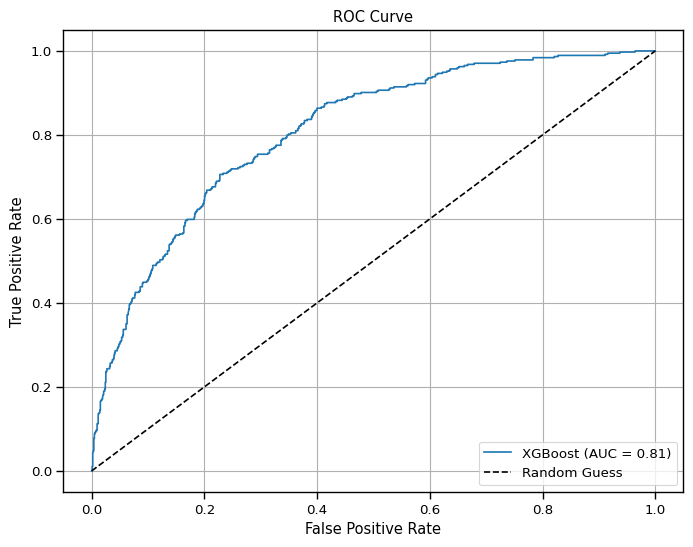

In [139]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## Metrics Pre-get_dummies() adjustment
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      1033
           1       0.54      0.65      0.59       374

    accuracy                           0.76      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.78      0.76      0.77      1407

Confusion Matrix:
 [[827 206]
 [130 244]]
ROC AUC Score: 0.8038176020210074

## Hyperparameter Tunning on XGBoost Model

In [148]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define base model
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=1  # Because I used SMOTE already
)

# Define parameter distribution
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

# Set up RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='recall',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Run the search on SMOTE-resampled data
random_search_xgb.fit(X_train_res, y_train_res)

# Best params and score
print("Best ROC AUC:", random_search_xgb.best_score_)
print("Best Params:", random_search_xgb.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:08:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:08:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:08:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:08:28] WARNING: /Users/runner/work/xgboost/xgboost/src

Best ROC AUC: 0.8692493946731235
Best Params: {'subsample': 1.0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.6}


Test ROC AUC: 0.8191861097162617
[[806 227]
 [120 254]]
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1033
           1       0.53      0.68      0.59       374

    accuracy                           0.75      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.78      0.75      0.76      1407



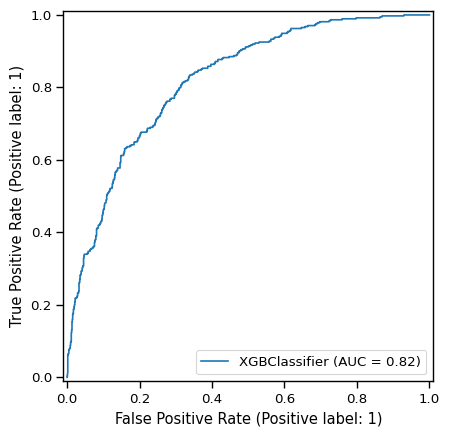

In [149]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, RocCurveDisplay

# Best estimator
best_xgb = random_search_xgb.best_estimator_

# Predictions
y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:, 1]

# Metrics
print("Test ROC AUC:", roc_auc_score(y_test, y_proba))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ROC Curve
RocCurveDisplay.from_estimator(best_xgb, X_test, y_test)
plt.show()


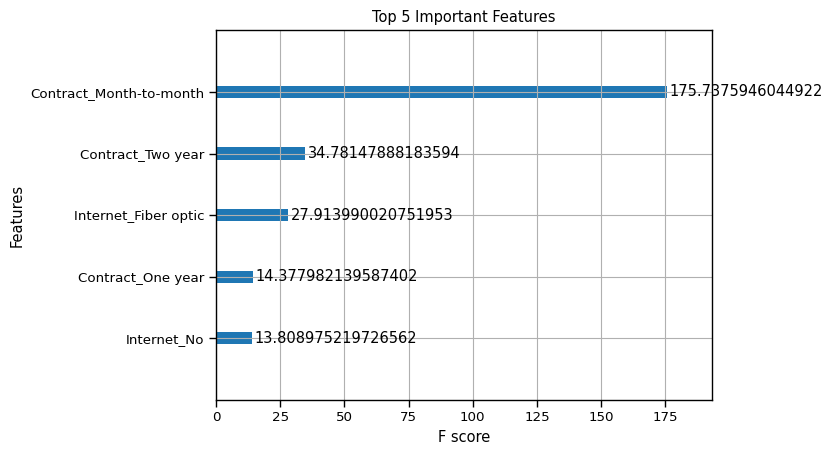

In [152]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(best_xgb, importance_type='gain', max_num_features=5)
plt.title("Top 5 Important Features")
plt.show()


In [176]:
import pandas as pd
from sklearn.metrics import precision_recall_curve, roc_auc_score

# Predict probabilities on test set
y_proba_test = random_search_xgb.best_estimator_.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_test)

# Create a DataFrame to explore threshold values
pr_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision[:-1],
    'Recall': recall[:-1]
})

# Sort by F1 score to find optimal balance
pr_df['F1'] = 2 * (pr_df['Precision'] * pr_df['Recall']) / (pr_df['Precision'] + pr_df['Recall'])
best_row = pr_df.loc[pr_df['F1'].idxmax()]

print("Best Threshold Info:")
print(best_row)


Best Threshold Info:
Threshold    0.604487
Precision    0.590000
Recall       0.631016
F1           0.609819
Name: 1005, dtype: float64


In [169]:
# Apply custom threshold
#optimal_thresh = 0.14 for 90% Recall of Churn customers
optimal_thresh = .45
y_pred_custom = (y_proba_test >= optimal_thresh).astype(int)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report (Threshold ~0.398):")
print(classification_report(y_test, y_pred_custom))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom))


Classification Report (Threshold ~0.398):
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1033
           1       0.51      0.71      0.60       374

    accuracy                           0.74      1407
   macro avg       0.69      0.73      0.70      1407
weighted avg       0.78      0.74      0.75      1407

Confusion Matrix:
[[779 254]
 [108 266]]


## Observations on Threshlod adjustment:
- Here we are trading precision of churners for recall.
- This is acceptable in churn predictions since it leads to capturing more potential churners.
- Detecting these potential churners early on can lead to effective retention interventions. 

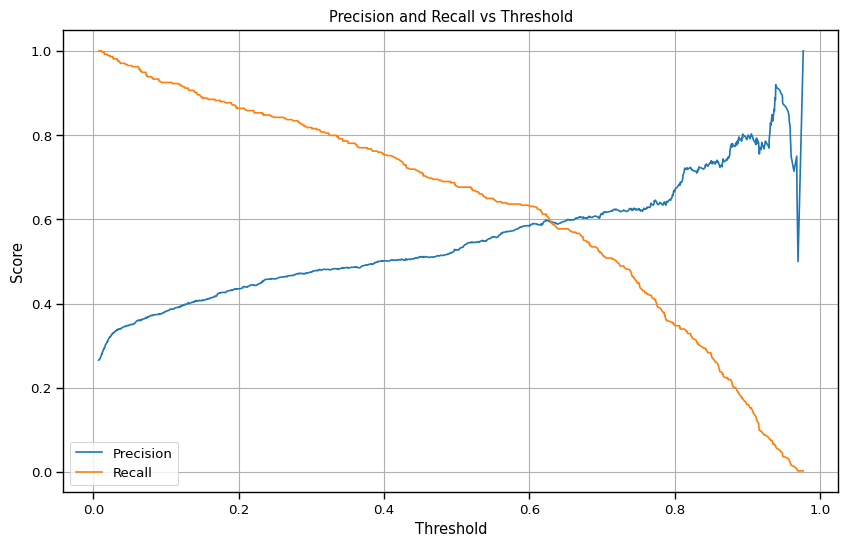

In [158]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()


# 6. Conclusion

### Key Insights Summarized

1) 

2) 

3) 

# 7. Business Suggestions
-
-
-
-



# STOPPED HERE! 

## 06/17

## Notes: 
- I have to add hypothesis testing to some sections.
- Summarize Key insights and make suggestions based on what I learned. 
